In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from datetime import datetime

In [5]:
df = pd.read_csv('SUM_DATA.csv')
# df = pd.read_csv('data.csv')
df = df.drop('STORE', axis=1)
df.head(10)
df.tail(10)

,SALE_DT,SALES
2,2019-03,7.278651e+08
3,2019-04,6.499091e+08
4,2019-05,6.118044e+08
5,2019-06,5.750736e+08
6,2019-07,5.511557e+08
7,2019-08,5.745834e+08
8,2019-09,5.596533e+08
9,2019-10,5.735714e+08
10,2019-11,6.270833e+08
11,2019-12,8.893998e+08


In [6]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,2019-01,6.116698e+08
1,2019-02,6.254852e+08
2,2019-03,7.278651e+08
3,2019-04,6.499091e+08
4,2019-05,6.118044e+08


In [7]:
df.shape

(12, 2)

In [8]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [9]:
df.tail()

,Month,Sales
7,2019-08,5.745834e+08
8,2019-09,5.596533e+08
9,2019-10,5.735714e+08
10,2019-11,6.270833e+08
11,2019-12,8.893998e+08


In [10]:
df.shape

(12, 2)

In [11]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [12]:
df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [13]:
df.head()

,Month,Sales
0,2019-01-01,6.116698e+08
1,2019-02-01,6.254852e+08
2,2019-03-01,7.278651e+08
3,2019-04-01,6.499091e+08
4,2019-05-01,6.118044e+08


In [14]:
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
2019-01-01,6.116698e+08
2019-02-01,6.254852e+08
2019-03-01,7.278651e+08
2019-04-01,6.499091e+08
2019-05-01,6.118044e+08


In [70]:
df.describe()

15476403.59

<Axes: xlabel='Month'>

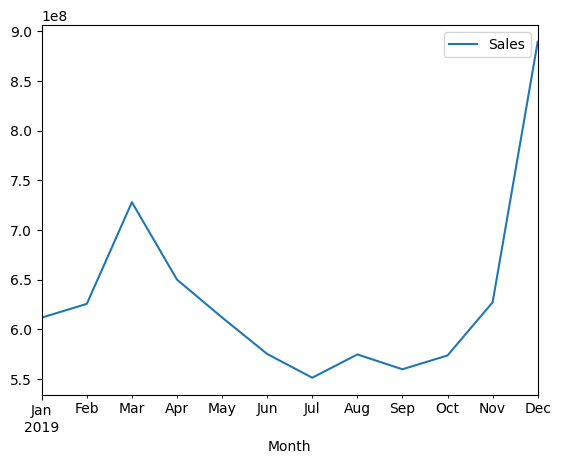

In [15]:
df.plot()

In [16]:
adfuller(df['Sales'])

(-1.1721877764419033,
 0.685443972097322,
 2,
 9,
 {'1%': -4.473135048010974,
  '5%': -3.28988060356653,
  '10%': -2.7723823456790124},
 274.27432499073353)